<a href="https://colab.research.google.com/github/AdrianduPlessis/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/LS_DS_131_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1) Load and clean the data (or determine the best method to drop observations when running tests)

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

##1) Load and clean the data (or determine the best method to drop observations when running tests)

In [25]:
headings = ['Dem/Rep',
            'handicapped-infants',
            'water-project-cost-sharing',
            'adoption-of-the-budget-resolution',
            'physician-fee-freeze',
            'el-salvador-aid',
            'religious-groups-in-schools',
            'anti-satellite-test-ban',
            'aid-to-nicaraguan-contras',
            'mx-missile',
            'immigration',
            'synfuels-corporation-cutback',
            'education-spending',
            'superfund-right-to-sue',
            'crime',
            'duty-free-exports',
            'export-administration-act-south-africa']


voting_issues = ['handicapped-infants',
            'water-project-cost-sharing',
            'adoption-of-the-budget-resolution',
            'physician-fee-freeze',
            'el-salvador-aid',
            'religious-groups-in-schools',
            'anti-satellite-test-ban',
            'aid-to-nicaraguan-contras',
            'mx-missile',
            'immigration',
            'synfuels-corporation-cutback',
            'education-spending',
            'superfund-right-to-sue',
            'crime',
            'duty-free-exports',
            'export-administration-act-south-africa']


dirty_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header=None, names=headings, na_values='?')
dirty_df.head(10)

,Dem/Rep,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y
5,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
6,democrat,n,y,n,y,y,y,n,n,n,n,n,n,NaN,y,y,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,NaN,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
9,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,NaN,NaN


In [0]:
#seperate into two samples: Rep/Dem
republican_subset = dirty_df[dirty_df['Dem/Rep'] == 'republican']
democrat_subset = dirty_df[dirty_df['Dem/Rep'] == 'democrat']

republican_subset.head()

#sanity check
assert (len(republican_subset)+len(democrat_subset)==len(dirty_df))

In [4]:
for issue in voting_issues:
  
  r_mode = republican_subset[issue].mode()[0]
  d_mode = democrat_subset[issue].mode()[0]
  
  republican_subset[issue].fillna(r_mode,inplace=True)
  democrat_subset[issue].fillna(d_mode, inplace=True)
  
  #convert n/y to 0/1 respectivley
  republican_subset = republican_subset.replace({issue: {'y': 1, 'n' : 0}})
  democrat_subset = democrat_subset.replace({issue: {'y': 1, 'n' : 0}})

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [5]:
republican_subset.head()

,Dem/Rep,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
7,republican,0,1,0,1,1,1,0,0,0,0,0,0,1,1,0,1
8,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
10,republican,0,1,0,1,1,0,0,0,0,0,0,1,1,1,0,0


##2) Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01

In [24]:
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel
import numpy as np

for issue in voting_issues:
  tstat, pvalue = ttest_ind(democrat_subset[issue], republican_subset[issue])
  print(f'For {issue}:')
  print('t-stat ', tstat)
  print('pvalue ', pvalue)
  print('----------------')

For handicapped-infants:
t-stat  9.746279241312045
pvalue  2.0074960037996152e-20
----------------
For water-project-cost-sharing:
t-stat  -0.22789967012174497
pvalue  0.8198318156454878
----------------
For adoption-of-the-budget-resolution:
t-stat  23.961445750509405
pvalue  2.159693257848193e-81
----------------
For physician-fee-freeze:
t-stat  -50.641376160580805
pvalue  4.976027685195905e-184
----------------
For el-salvador-aid:
t-stat  -22.022186479520858
pvalue  1.168664184293552e-72
----------------
For religious-groups-in-schools:
t-stat  -10.247737985951469
pvalue  3.285780648674881e-22
----------------
For anti-satellite-test-ban:
t-stat  13.263487606782622
pvalue  6.208204071206153e-34
----------------
For aid-to-nicaraguan-contras:
t-stat  19.107898307857287
pvalue  1.7985497139699381e-59
----------------
For mx-missile:
t-stat  17.577382807154244
pvalue  1.361418361585244e-52
----------------
For immigration:
t-stat  -2.0577071007442744
pvalue  0.04021640113080311
-----

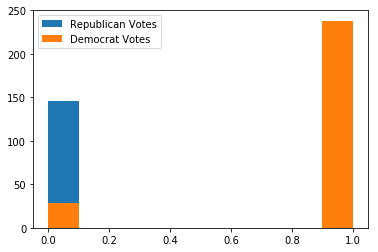

In [48]:
fig, axs = plt.subplots(1, 1)

# We can set the number of bins with the `bins` kwarg
axs.hist(republican_subset['adoption-of-the-budget-resolution'])
axs.hist(democrat_subset['adoption-of-the-budget-resolution'])
axs.legend(["Republican Votes", 'Democrat Votes'])

###Random Sampling Method Attempt (only needed with very small data sizes)

In [0]:
dem_means = []
rep_means = []

num_samplings = 30
for _ in range(num_samplings):
  dem_means.append([np.mean(democrat_subset['handicapped-infants'].sample(20))])
  rep_means.append([np.mean(republican_subset['handicapped-infants'].sample(20))])

In [23]:

tstat, pvalue = ttest_ind(dem_means, rep_means)

#print(f'For {issue}:')
print('t-stat ', tstat)
print('pvalue ', pvalue)
print('----------------')

t-stat  [17.71129254]
pvalue  [4.5502588e-25]
----------------


##Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01

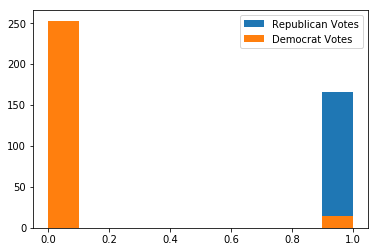

In [76]:
fig, axs = plt.subplots(1, 1)

# We can set the number of bins with the `bins` kwarg
axs.hist(republican_subset['physician-fee-freeze'])
axs.hist(democrat_subset['physician-fee-freeze'])
axs.legend(["Republican Votes", 'Democrat Votes'])


##Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)


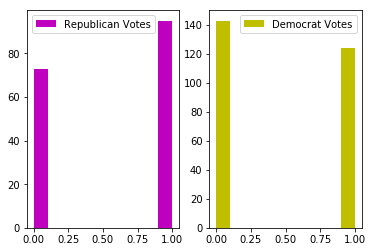

In [68]:
fig, axs = plt.subplots(1, 2)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(republican_subset['immigration'], color='m')
axs[1].hist(democrat_subset['immigration'], color='y')
axs[0].legend(['Republican Votes'])
axs[1].legend(['Democrat Votes'])

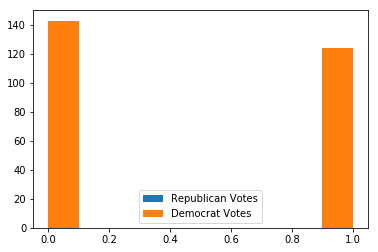

In [80]:
###TODO---> figure out why this graph is broken


fig, axs = plt.subplots(1, 1)

# We can set the number of bins with the `bins` kwarg
axs.hist(republican_subset['immigration'])
axs.hist(democrat_subset['immigration'])
axs.legend(["Republican Votes", 'Democrat Votes'])